In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
#  Not used -----------------------------------------------------------------------------------------------------------------
#%matplotlib inline
#import datetime
#from datetime import datetime, date
#----------------------------------------------------------------------------------------------------------------------------
pd.set_option('display.max_rows',10)
pd.set_option('display.width',100)
#  Not used -----------------------------------------------------------------------------------------------------------------
#pd.set_option('display.notebook_repr_html',False)
#pd.set_option('display.max_columns',10)
#----------------------------------------------------------------------------------------------------------------------------

In [2]:
df=pd.read_csv('Advertising.csv', sep=',', usecols=range(1,5)) # Reading cvs file omiting first column
#df=df.dropna() # Cleaning dataset from any row with at least one column with "NaN" values, this is optional.......

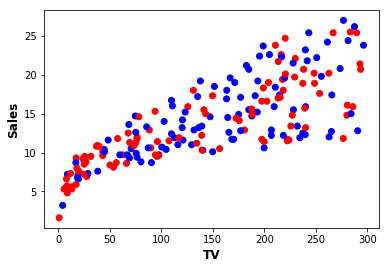

In [5]:
aColors=['red','blue'] # Selecting variables colors on the graph
xVariable=df['TV']     # Selecting our predictor variables
yVariable=df['Sales']  # Selecting our response variable
plt.scatter(xVariable,yVariable, c=aColors)         # Plotting graph, with selected colors
plt.xlabel('TV',size=12, fontweight='semibold')     # Setting x axis label with some properties
plt.ylabel('Sales',size=12, fontweight='semibold')  # Setting x axis label with some properties
plt.show()                                          # Showing in graph command

In [15]:
#-----------------REGRESSION ANALYSIS-----------------------------------------------------------------------------------------
#plt.scatter?
#linear_regression = \
#linear_model.LinearRegression(normalize=False,fit_intercept=True)
#xReVar = df['TV'].values.reshape((observations,1)) 
#linear_regression.fit(xReVar,yVariable)
#print (linear_regression.coef_)
#print (linear_regression.intercept_)
#----------------------------------------------------------------------------------------------------------------------------
observations = len(df)       # Total number of values
xVarMean=df['TV'].mean()     # Cal. TV mean
yVarMean=df['Sales'].mean()  # Cal. Sales mean
aNume = 0
aDeno = 0
for i in range(observations):
    aNume += (xVariable[i] - xVarMean) * (yVariable[i] - yVarMean)
    aDeno += (xVariable[i] - xVarMean) ** 2
b1 = aNume / aDeno
b0 = yVarMean - (b1 * xVarMean)
print('Regression Equation is:')
print('Sales=',b0,'+',b1,'*TV')

Regression Equation is:
Sales= 7.032593549127705 + 0.04753664043301969 *TV


In [24]:
def covariance(aVariable,bVariable,bias=0):
    aObservations=float(len(aVariable))
    return np.sum((aVariable-np.mean(aVariable))*(bVariable-np.mean(bVariable)))/(aObservations-min(bias,1))
#----------------------------------------------------------------------------------------------------------------------------
def standardize(cVariable):
    return ((cVariable-np.mean(cVariable))/np.std(cVariable))
#----------------------------------------------------------------------------------------------------------------------------
def correlation(dVariable,eVariable,bias=0):
    return (covariance(standardize(dVariable),standardize(eVariable),bias))
                  
#covariance(xVariable,yVariable)
from scipy.stats import pearsonr
print('Our correlation estimate: %0.5f' % (correlation(df['TV'],df['Sales'])))
print('Correlation from Scipy personr estimation: %0.5f' % pearsonr(df['TV'],df['Sales'])[0])


Our correlation estimate: 0.78222
Correlation from Scipy personr estimation: 0.78222


In [26]:
#----------------------------------------------------------------------------------------------------------------------------
#x_range=[df['TV'].min(),df['TV'].max()]                                                                                   #-
#y_range=[df['Sales'].min(),df['Sales'].max()]                                                                             #-
#scatter_plot=df.plot(kind='scatter',x='TV',y='Sales',xlim=x_range,ylim=y_range)                                           #-
#----------------------------------------------------------------------------------------------------------------------------

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
x=df['TV']
y=df['Sales']
x=sm.add_constant(x)

In [31]:
x.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [32]:
linear_regression=smf.ols(formula='Sales ~ TV',data=df)
fitted_model=linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           1.47e-42
Time:                        00:23:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

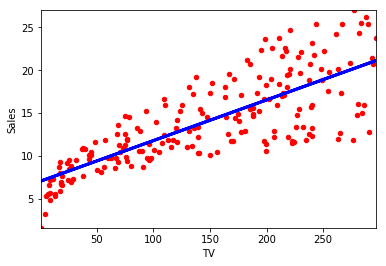

In [53]:
#----------------------------------------------------------------------------------------------------------------------------
fitted_values=fitted_model.predict(x)                                                                                       #-
x_range=[df['TV'].min(),df['TV'].max()]                                                                                     #-
y_range=[df['Sales'].min(),df['Sales'].max()]                                                                               #-
scatter_plot=df.plot(kind='scatter',x='TV',y='Sales',color='red',xlim=x_range,ylim=y_range)                                 #-
#meanY=scatter_plot.plot(x_range,[df['Sales'].mean(),df['Sales'].mean()],'--', color='red', linewidth=1)                    #-
#meanX=scatter_plot.plot([df['TV'].mean(),df['TV'].mean()],'--',  color='red', linewidth=1)                                 #-
regression_line=scatter_plot.plot(df['TV'],fitted_values,'-',color='blue', linewidth=3)                                     #-
#----------------------------------------------------------------------------------------------------------------------------